# Random Walks 

> In mathematics, a random walk, sometimes known as a drunkard's walk, is a stochastic process that describes a path that consists of a succession of random steps on some mathematical space. 
>
> An elementary example of a random walk is the random walk on the integer number line Z which starts at 0, and at each step moves +1 or −1 with equal probability. 
>
> https://en.wikipedia.org/wiki/Random_walk


In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Pure Python Way

Let’s first consider a simple random walk starting at 0 with steps of 1 and
–1 occurring with equal probability.

Here is a pure Python way to implement a single random walk with 1,000 steps using
the built-in random module:

In [2]:
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

Let's plot the first 100 values on one of these random walks:

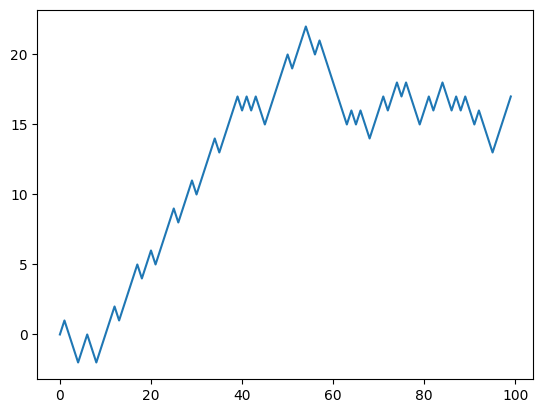

In [3]:
plt.plot(walk[:100])

## Numpy Way 

I use the `numpy.random` module to draw 1,000 coin flips at once, set these to 1 and –1, and compute the cumulative sum:

In [4]:
nsteps = 1000
rng = np.random.default_rng(seed=12345)
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

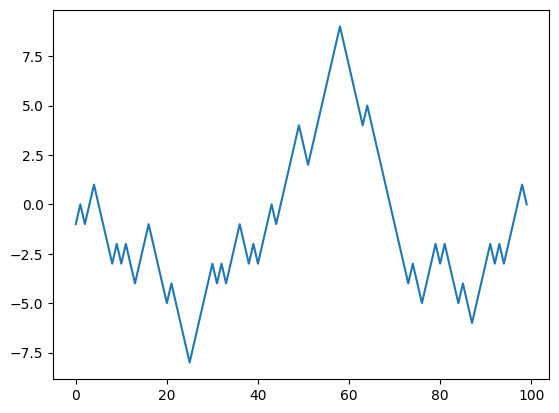

In [5]:
plt.plot(walk[:100])

We can begin to extract the minimum and maximum value along the walk’s trajectory:

In [6]:
walk.min()

np.int64(-8)

In [7]:
walk.max()

np.int64(50)

A more complicated statistic is the first crossing time, the step at which the random walk reaches a particular value. Here we might want to know how long it took the random walk to get at least 10 steps away from the origin 0 in either direction. `np.abs(walk) >= 10` gives us a Boolean array indicating where the walk has reached or exceeded 10, but we want the index of the first 10 or –10. Turns out, we can compute this using `argmax`, which returns the first index of the maximum value in the Boolean array (True is the maximum value):

In [8]:
(np.abs(walk) >= 10).argmax()

np.int64(155)

## Simulating Many Random Walks at Once

In [9]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
walks

array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]], shape=(5000, 1000))

We can compute the maximum and minimum values obtained over all of the walks:

In [10]:
walks.max()

np.int64(114)

In [11]:
walks.min()

np.int64(-120)

Out of these walks, let’s compute the minimum crossing time to 30 or –30. This is slightly tricky because not all 5,000 of them reach 30. We can check this using the any method:

In [12]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30

array([False,  True,  True, ...,  True, False,  True], shape=(5000,))

In [13]:
hits30.sum() # Number that hit 30 or -30

np.int64(3395)

We can use this Boolean array to select the rows of walks that actually cross the absolute 30 level, and call `argmax` across axis 1 to get the crossing times:

In [14]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

array([201, 491, 283, ..., 219, 259, 541], shape=(3395,))

We can compute the average minimum crossing time:

In [15]:
crossing_times.mean()

np.float64(500.5699558173785)

## Different Random Generator

Let's use a different random generator method, like `standard_normal` to generate normally distributed steps with some mean and standard deviation:

In [16]:
draws = 0.25 * rng.standard_normal((nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
walks

array([[ -1,  -2,  -3, ...,   0,  -1,  -2],
       [ -1,  -2,  -1, ..., -42, -43, -44],
       [  1,   0,   1, ...,   4,   3,   2],
       ...,
       [  1,   0,  -1, ...,   0,  -1,   0],
       [ -1,   0,  -1, ..., -40, -39, -40],
       [ -1,  -2,  -3, ...,  10,   9,  10]], shape=(5000, 1000))

In [17]:
walks.max()

np.int64(121)

In [18]:
walks.min()

np.int64(-116)

In [19]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30

array([False,  True,  True, ..., False,  True,  True], shape=(5000,))

In [20]:
hits30.sum()

np.int64(3384)

In [21]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

array([323, 207, 435, ..., 463, 375, 535], shape=(3384,))

In [22]:
crossing_times.mean()

np.float64(508.0791962174941)